# Convolutional Neural Networks

__Prerequisites__

- [Neural Networks](https://github.com/AI-Core/Neural-Networks/blob/master/Neural%20Networks.ipynb)

## What's wrong with how neural networks process images?

The fully connected neural network we looked at in the previous lesson takes in a vector as input. So we flattened our images by stacking the rows so that it could be passed in as input and used for classification problems successfully. 

#### Spacially structured data

For some problems, the order of the features in each example does not matter (e.g. age, height, hair length). But this isn't the case for images. If we randomly reorder the pixels in an image, then it will likely be unrecognisable. Most of the useful information in images comes not from the values of the features (pixels), but from their relative positions. The same is true for processing any other **spacially structured** data such as videos, soundwaves, medical scans, 3D-models etc. 

The spatial relationships between the different pixels is information that is crucial to our understanding of an image. When we flatten the image, we lose this information.

#### Weight sharing across space

Regardless of where I see something interesting in my field of view, it can often be processed in the same way. 

Neural networks have individual weights for each input feature because they expect each feature to represent a totally different thing (e.g. age, height, weight). In other domains like computer vision however, different features (pixels) can represent the same thing just in different locations (e.g. money on my left, money on my right).

Instead of learning to look for the same features of an image with different weights for each position that that feature might be in, we should try to share the same learnt weights over all positions of the input. This will save us both time and memory in computing and storing these duplicate weights. 

#### So what

Using our prior understanding of how image data should be processed spacially, we'd like to find some kind of model that can retain the spacial structure of an input, and look for the same features over the whole of this space. This is what we will use convolutional neural networks for.

## Images as data

Images are not naturally vectors. They obviously have a height and a width rather than just a length - so they need to at least be a matrix. 

#### Channels

Any non-black color can be made by combining 3 primary colors.
As such, as well as height and width, color images have another axis called the **channels**, which specifies the intensity (contribution) of each of these primary colors.
Red, green and blue are the (arbitrary) standard primary colors. 
So most images that we will work with have a red channel, a green channel and a blue channel.
This is illustrated below.

![image](images/CNN_RGB.JPG)

Some images can also have transparent backgrounds, in which case they might have a fourth channel to represent the opacity at each pixel location.

## How was computer vision done before deep learning?

In the past, people would try to draw patterns that they thought would appear in images and be useful for the problem that they were trying to solve. This was a painstakingly long process, and was obviously susceptible to a lot of bias by these feature designers.

## Filters/Kernels
These supposedly useful patterns mentioned above are known as **filters** or **kernels**. 
Each filter looks for a particular pattern.
E.g. a filter that looks for circles would have high values in a circle and low values in other locations.

![title](images/kernels.jpg)

Filters *look* for the patterns they represent by seeing how similar the pixels at any particular location match the values that they contain. A mathematically convenient way to do this is by taking a **dot product** between the filter's values and the input values which it covers - an element wise multiplication and sum of the results. **This produces a single value** which should be larger when the input better matches the feature that the filter looks for.

It is standard for filters to always convolve through the full depth of the input. So if we have an input with 3 channels (e.g. a color image), our kernel will also have a depth of 3 - where each channel of the filter is what it looks for from that corresponding color channel. If our input has 54 channels, then so will our filter. 

The width and height of our kernels is up to us (they are hyperparameters). It's standard to have kernels with equal width and height.

## The convolution operation

In machine learning, convolution is the proccess of moving a filter across every possible position of the input and computing a value for how well it is matched at each location. 

This pattern matching over the spacially structured input produces a similar spacially structured output. We call this output an **activation map** or a **feature map** because it represents the activations in the next layer that should represent some higher level (more complex) features than the feature maps in the input.

The animation below shows how a 1x3x3 filter is applied to a 1x5x5 image (for simplicity, input channels = 1). 
On the left is the filter that we will convolve over the input. In the centre is the input being convolved over. On the right is the output activation map produced by convolving this filter over this input.

Notice how the output has high  values when the filter is passed over locations where there is an X shape in the input image. This is because the values of the filter are such that it is performing pattern matching for the X shape.

![image](images/convolution_animation.gif)

The convolution operation has a few possible parameters:

### Stride
The stride is the number of pixels we shift our kernel along by to compute the next value in the output activation map. Increased stride means less values are computed for the output activation map, which means that we have to do less computation and store less output information, decreasing computing time and cost and reducing memory requirements but reducing output resolution.

### Padding
We can *pad* the input with a border of extra pixels around the edge. Why might we want to do this?

##### Model depth limitations

When we use a kernel size larger than one, each single output value is a function of many input values (all the pixels which the filter covers). This means that the size of the convolution output is smaller than the input. As such, there is a limit to the number of successive convolutions that we can apply because eventually the input gets so small that there is only one location of the input that the filter can be placed on the input and the output will then have a height and width of 1 and cannot be convolved over (convolution with a 1x1 filter is equivalent to multiplication).

##### Equal input from each pixel

When we use a kernel size larger than one, the corner pixels will only contribute to a single output value because they only enter the kernel at it's very extreme positions. As such they contribute less to the final predictions than the other pixels. The same is true for pixels near the edge, but to a lesser extent.

#### Different padding modes

We can use different "padding modes" to specify what we pad the image with. Options include padding it with zeros, continuing the last color outwards, reflecting the inwards colors. See options provided by PyTorch [here](

![image](images/CNN_diagram.JPG)

For convolution, each computed value in the output feature map is a linear function of the pixels in a local region of the input as opposed to fully connected nets where each computed feature is a linear function of all the values in the input.

## The convolutional layer

In practice, we want to look for more than just one feature in any input. When we used a neural network, each layer had multiple outputs corresponding to different learnt features. Similarly, instead of convolving just a single filter over the input to produce a single activation map, we convolve many filters over the input to produce many activation maps. This produces a stack of activation maps as the output. The output then has an extra dimension, in addition to the spacial ones, which corresponds to which output activation map you're looking at. This dimension is the convolutional analogy to the number of outputs from a linear layer.

Also just like linear layers, convolutional layers apply a simple linear transformation to their input and can be applied successively with activation functions to represent very complex non-linear transformations. Models with such layers are **convolutional neural networks**. These are appropriate for tackling problems like object detection and image segmentation. These convolutional layers have values for each weight within each filter and also include biases to shift each output feature. 
Just like before, each successive layer in the network learns successively higher level abstract features from the inputs.

These convolutional layers are also provided by PyTorch. In this notebook we will use `torch.nn.Conv2D` to convolve over our input in 2 directions (width and height).

![image](images/CNN_FNN_comparison.JPG)

## What does each filter look for?
Engineers used to have to tune filter values manually. Now, just like the weights and biases in linear layers of neural networks, they can be learnt automatically by backpropagation and gradient descent.

## Pooling layers
Immediately after a convolutional layer, it is common to apply some form of **pooling**. Pooling is a technique that summarises/downsamples the values in a local region of its input. This reduces the number of values in its output, therefore reducing the number of parameters that need to be learned for a succeeding parameterised operation such as a further convolutional or linear layer.

Because pooling summarises values in local spacial regions it can help models to be robust under translation of the input, making them more **translation invariant**.

Pooling layers also slide kernels over their input, and reduce the values within that grid location to a single value. But they perform different operations than a linear combination like in convolution (see below).

**Max pooling** replaces the values at each grid location with their maximum.

**Average Pooling** replaces the values at each grid location with their average.

See the PyTorch [docs](https://pytorch.org/docs/stable/nn.html#pooling-layers) for more pooling layers

## The output of convolutional neural networks

Unless we keep applying convolutional layers to our data until it is reduced to a height and width of 1, the output will still retain some spacial dimensions. This means that as well as our input, our output can also be an image for example. This can be useful for problems such as image segmentation, where the output is a pixelwise classification mask of everything in the scene. In this case the output is the same shape as the input image, but with each pixel location taking the value of a class label (e.g. all pixels of cars in the image have value=1, all roads have value=2 etc).

In our case though, we want to perform image classification for 10 classes. It is common practice to flatten the output of the convolutional layers of a network into a vector, and then transform them into a vector of the desired output shape by applying a final linear layer. This is what we do below

## Let's implement a convolutional neural network

The first cell is just the same boilerplate we've used before. Make sure you understand it and then run it.

In [56]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.tensorboard import SummaryWriter  # displays our loss curve as we go

# GET THE TRAINING DATASET
train_data = datasets.MNIST(root='MNIST-data',                        # where is the data (going to be) stored
                            transform=transforms.ToTensor(),          # transform the data from a PIL image to a tensor
                            train=True,                               # is this training data?
                            download=True                             # should i download it if it's not already here?
                           )

# PIL is Python Image Library, which we need to transform into a Tensor

# GET THE TEST DATASET
test_data = datasets.MNIST(root='MNIST-data',
                           transform=transforms.ToTensor(),
                           train=False,
                          )

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

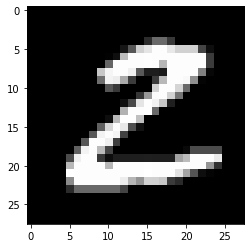

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])


In [57]:
example = train_data[np.random.randint(0, 300)][0]    # get a random example
x = example[0]
print(x) # the data
#y = example[1]
#print(y) # the label
plt.imshow(x.numpy(),cmap='gray')
plt.show()

# FURTHER SPLIT THE TRAINING INTO TRAINING AND VALIDATION
train_data, val_data = torch.utils.data.random_split(train_data, [50000, 10000])    # split into 50K training & 10K validation

batch_size = 128

# The Data Loaders are batching the data for us and are also shuffling them.

# MAKE TRAINING DATALOADER
train_loader = torch.utils.data.DataLoader(
    train_data,
    shuffle=True,
    batch_size=batch_size
)

# MAKE VALIDATION DATALOADER
val_loader = torch.utils.data.DataLoader(
    val_data,
    shuffle=True,
    batch_size=batch_size
)

# MAKE TEST DATALOADER
test_loader = torch.utils.data.DataLoader(
    test_data,
    shuffle=True,
    batch_size=batch_size
)
print(x[0])

In [62]:
import torch.nn.functional as F

class ConvNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
            # conv2d(in_channels, out_channels, kernel_size)
            # in_channels is the number of layers which it takes in (i.e.num color channels in 1st layer)
            # out_channels is the number of different filters that we use
            # kernel_size is the depthxwidthxheight of the kernel#
            # stride is how many pixels we shift the kernel by each time
        self.conv_layers = torch.nn.Sequential( # put your convolutional architecture here using torch.nn.Sequential
            # torch.nn.Sequential takes a tuple of callable objects 
            torch.nn.Conv2d(1, 64, kernel_size=3, stride=1),  # choosing 64 kernels
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 128, kernel_size=3),
            torch.nn.ReLU()
            
            # first conv layer
            # activation function
            # second conv layer
            # activation function
        )

        self.fc_layers = torch.nn.Sequential(
             # put your linear architecture here using torch.nn.Sequential 
            torch.nn.Linear(73728, 32),
            torch.nn.Linear(32, 10)  # inputs is output of last convolution flattened, 10 output classes
        )
    def forward(self, x):
        x = self.conv_layers(x)# pass through conv layers
        x = x.view(-1, np.prod(x.shape[1:]))# flatten output ready for fully connected layer
        # x.shape[1:] takes all dimensions but the first one
        x = self.fc_layers(x)# pass through fully connected layer
        x = F.softmax(x) # softmax activation function on outputs
        return x

In [63]:
# my_cnn = ConvNet() # this is callable
# my_cnn(image)

In [64]:
use_cuda = torch.cuda.is_available() # checks if gpu is available
device = torch.device("cuda" if use_cuda else "cpu")
learning_rate = 0.0005 # set learning rate
epochs = 5 # set number of epochs

cnn = ConvNet().to(device) #.to(device)#instantiate model
criterion = torch.nn.CrossEntropyLoss() #use cross entropy loss function
optimiser = torch.optim.Adam(cnn.parameters(), lr=learning_rate) # use Adam optimizer, passing it the parameters of your model and the learning rate

# SET UP TRAINING VISUALISATION
writer = SummaryWriter() # we will use this to show our models performance on a graph

In [65]:
def train(model, epochs, verbose=True, tag='Loss/Train'):
    for epoch in range(epochs):
        for idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            # pass x through your model to get a prediction
            prediction = model(inputs)             # pass the data forward through the model
            loss = criterion(prediction, labels)   # compute the cost
            if verbose: print('Epoch:', epoch, '\tBatch:', idx, '\tLoss:', loss.item())
            optimiser.zero_grad()                  # reset the gradients attribute of all of the model's params to zero
            loss.backward()                        # backward pass to compute and store all of the model's param's gradients
            optimiser.step()                       # update the model's parameters
            
            writer.add_scalar(tag, loss, epoch*len(train_loader) + idx)    # write loss to a graph
    print('Training Complete. Final loss =',loss.item())
    
train(cnn, epochs)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 0 	Batch: 0 	Loss: 2.3017172813415527
Epoch: 0 	Batch: 1 	Loss: 2.3295199871063232
Epoch: 0 	Batch: 2 	Loss: 2.2656445503234863
Epoch: 0 	Batch: 3 	Loss: 2.3148691654205322
Epoch: 0 	Batch: 4 	Loss: 2.2669339179992676
Epoch: 0 	Batch: 5 	Loss: 2.2320775985717773
Epoch: 0 	Batch: 6 	Loss: 2.2287752628326416
Epoch: 0 	Batch: 7 	Loss: 2.2080023288726807
Epoch: 0 	Batch: 8 	Loss: 2.0927157402038574
Epoch: 0 	Batch: 9 	Loss: 2.0747525691986084
Epoch: 0 	Batch: 10 	Loss: 1.9890869855880737
Epoch: 0 	Batch: 11 	Loss: 1.9745988845825195
Epoch: 0 	Batch: 12 	Loss: 1.9161632061004639
Epoch: 0 	Batch: 13 	Loss: 1.922075629234314
Epoch: 0 	Batch: 14 	Loss: 1.8465347290039062
Epoch: 0 	Batch: 15 	Loss: 1.8804634809494019
Epoch: 0 	Batch: 16 	Loss: 1.8911025524139404
Epoch: 0 	Batch: 17 	Loss: 1.8284443616867065
Epoch: 0 	Batch: 18 	Loss: 1.913866400718689
Epoch: 0 	Batch: 19 	Loss: 1.8223391771316528
Epoch: 0 	Batch: 20 	Loss: 1.8104779720306396
Epoch: 0 	Batch: 21 	Loss: 1.762607216835022
E

Epoch: 0 	Batch: 178 	Loss: 1.5762763023376465
Epoch: 0 	Batch: 179 	Loss: 1.5800583362579346
Epoch: 0 	Batch: 180 	Loss: 1.513466477394104
Epoch: 0 	Batch: 181 	Loss: 1.6404004096984863
Epoch: 0 	Batch: 182 	Loss: 1.5980699062347412
Epoch: 0 	Batch: 183 	Loss: 1.5410723686218262
Epoch: 0 	Batch: 184 	Loss: 1.5281157493591309
Epoch: 0 	Batch: 185 	Loss: 1.5167372226715088
Epoch: 0 	Batch: 186 	Loss: 1.5611010789871216
Epoch: 0 	Batch: 187 	Loss: 1.5480053424835205
Epoch: 0 	Batch: 188 	Loss: 1.5143311023712158
Epoch: 0 	Batch: 189 	Loss: 1.5082833766937256
Epoch: 0 	Batch: 190 	Loss: 1.5279673337936401
Epoch: 0 	Batch: 191 	Loss: 1.5173019170761108
Epoch: 0 	Batch: 192 	Loss: 1.522297978401184
Epoch: 0 	Batch: 193 	Loss: 1.5212093591690063
Epoch: 0 	Batch: 194 	Loss: 1.5414501428604126
Epoch: 0 	Batch: 195 	Loss: 1.5443907976150513
Epoch: 0 	Batch: 196 	Loss: 1.500675082206726
Epoch: 0 	Batch: 197 	Loss: 1.528581142425537
Epoch: 0 	Batch: 198 	Loss: 1.528075933456421
Epoch: 0 	Batch: 1

Epoch: 0 	Batch: 354 	Loss: 1.514717698097229
Epoch: 0 	Batch: 355 	Loss: 1.5119324922561646
Epoch: 0 	Batch: 356 	Loss: 1.4943675994873047
Epoch: 0 	Batch: 357 	Loss: 1.5194426774978638
Epoch: 0 	Batch: 358 	Loss: 1.4939274787902832
Epoch: 0 	Batch: 359 	Loss: 1.4959214925765991
Epoch: 0 	Batch: 360 	Loss: 1.4813861846923828
Epoch: 0 	Batch: 361 	Loss: 1.4961460828781128
Epoch: 0 	Batch: 362 	Loss: 1.50568425655365
Epoch: 0 	Batch: 363 	Loss: 1.485313057899475
Epoch: 0 	Batch: 364 	Loss: 1.4955095052719116
Epoch: 0 	Batch: 365 	Loss: 1.481604814529419
Epoch: 0 	Batch: 366 	Loss: 1.514917254447937
Epoch: 0 	Batch: 367 	Loss: 1.5027623176574707
Epoch: 0 	Batch: 368 	Loss: 1.5014278888702393
Epoch: 0 	Batch: 369 	Loss: 1.5141514539718628
Epoch: 0 	Batch: 370 	Loss: 1.4771572351455688
Epoch: 0 	Batch: 371 	Loss: 1.503778338432312
Epoch: 0 	Batch: 372 	Loss: 1.500123381614685
Epoch: 0 	Batch: 373 	Loss: 1.509087324142456
Epoch: 0 	Batch: 374 	Loss: 1.4851549863815308
Epoch: 0 	Batch: 375 	

Epoch: 1 	Batch: 141 	Loss: 1.492078423500061
Epoch: 1 	Batch: 142 	Loss: 1.4773526191711426
Epoch: 1 	Batch: 143 	Loss: 1.519448161125183
Epoch: 1 	Batch: 144 	Loss: 1.4704116582870483
Epoch: 1 	Batch: 145 	Loss: 1.486060619354248
Epoch: 1 	Batch: 146 	Loss: 1.4779621362686157
Epoch: 1 	Batch: 147 	Loss: 1.4981584548950195
Epoch: 1 	Batch: 148 	Loss: 1.488427996635437
Epoch: 1 	Batch: 149 	Loss: 1.471592903137207
Epoch: 1 	Batch: 150 	Loss: 1.4668635129928589
Epoch: 1 	Batch: 151 	Loss: 1.4785908460617065
Epoch: 1 	Batch: 152 	Loss: 1.4954687356948853
Epoch: 1 	Batch: 153 	Loss: 1.5071675777435303
Epoch: 1 	Batch: 154 	Loss: 1.48356294631958
Epoch: 1 	Batch: 155 	Loss: 1.5342893600463867
Epoch: 1 	Batch: 156 	Loss: 1.4770921468734741
Epoch: 1 	Batch: 157 	Loss: 1.5139811038970947
Epoch: 1 	Batch: 158 	Loss: 1.4906487464904785
Epoch: 1 	Batch: 159 	Loss: 1.4940723180770874
Epoch: 1 	Batch: 160 	Loss: 1.4789819717407227
Epoch: 1 	Batch: 161 	Loss: 1.5019302368164062
Epoch: 1 	Batch: 162

Epoch: 1 	Batch: 317 	Loss: 1.4930119514465332
Epoch: 1 	Batch: 318 	Loss: 1.5071690082550049
Epoch: 1 	Batch: 319 	Loss: 1.4887018203735352
Epoch: 1 	Batch: 320 	Loss: 1.4620970487594604
Epoch: 1 	Batch: 321 	Loss: 1.5012500286102295
Epoch: 1 	Batch: 322 	Loss: 1.5160245895385742
Epoch: 1 	Batch: 323 	Loss: 1.4941270351409912
Epoch: 1 	Batch: 324 	Loss: 1.4886984825134277
Epoch: 1 	Batch: 325 	Loss: 1.478170394897461
Epoch: 1 	Batch: 326 	Loss: 1.4698681831359863
Epoch: 1 	Batch: 327 	Loss: 1.4855895042419434
Epoch: 1 	Batch: 328 	Loss: 1.4944263696670532
Epoch: 1 	Batch: 329 	Loss: 1.5045568943023682
Epoch: 1 	Batch: 330 	Loss: 1.4916183948516846
Epoch: 1 	Batch: 331 	Loss: 1.5043623447418213
Epoch: 1 	Batch: 332 	Loss: 1.4804178476333618
Epoch: 1 	Batch: 333 	Loss: 1.4848051071166992
Epoch: 1 	Batch: 334 	Loss: 1.4971754550933838
Epoch: 1 	Batch: 335 	Loss: 1.4868799448013306
Epoch: 1 	Batch: 336 	Loss: 1.470826506614685
Epoch: 1 	Batch: 337 	Loss: 1.5001806020736694
Epoch: 1 	Batch

Epoch: 2 	Batch: 104 	Loss: 1.4794830083847046
Epoch: 2 	Batch: 105 	Loss: 1.4968507289886475
Epoch: 2 	Batch: 106 	Loss: 1.4734063148498535
Epoch: 2 	Batch: 107 	Loss: 1.4752341508865356
Epoch: 2 	Batch: 108 	Loss: 1.4823784828186035
Epoch: 2 	Batch: 109 	Loss: 1.4898021221160889
Epoch: 2 	Batch: 110 	Loss: 1.4615025520324707
Epoch: 2 	Batch: 111 	Loss: 1.4909194707870483
Epoch: 2 	Batch: 112 	Loss: 1.4893649816513062
Epoch: 2 	Batch: 113 	Loss: 1.476210117340088
Epoch: 2 	Batch: 114 	Loss: 1.4908045530319214
Epoch: 2 	Batch: 115 	Loss: 1.4810725450515747
Epoch: 2 	Batch: 116 	Loss: 1.4932399988174438
Epoch: 2 	Batch: 117 	Loss: 1.4695250988006592
Epoch: 2 	Batch: 118 	Loss: 1.4624707698822021
Epoch: 2 	Batch: 119 	Loss: 1.4618043899536133
Epoch: 2 	Batch: 120 	Loss: 1.481270670890808
Epoch: 2 	Batch: 121 	Loss: 1.4703561067581177
Epoch: 2 	Batch: 122 	Loss: 1.4688477516174316
Epoch: 2 	Batch: 123 	Loss: 1.4919017553329468
Epoch: 2 	Batch: 124 	Loss: 1.492050051689148
Epoch: 2 	Batch:

Epoch: 2 	Batch: 280 	Loss: 1.4721254110336304
Epoch: 2 	Batch: 281 	Loss: 1.5044232606887817
Epoch: 2 	Batch: 282 	Loss: 1.4749666452407837
Epoch: 2 	Batch: 283 	Loss: 1.480296015739441
Epoch: 2 	Batch: 284 	Loss: 1.4627007246017456
Epoch: 2 	Batch: 285 	Loss: 1.4796613454818726
Epoch: 2 	Batch: 286 	Loss: 1.4879428148269653
Epoch: 2 	Batch: 287 	Loss: 1.4709537029266357
Epoch: 2 	Batch: 288 	Loss: 1.4835783243179321
Epoch: 2 	Batch: 289 	Loss: 1.4952327013015747
Epoch: 2 	Batch: 290 	Loss: 1.4774657487869263
Epoch: 2 	Batch: 291 	Loss: 1.4731324911117554
Epoch: 2 	Batch: 292 	Loss: 1.4617807865142822
Epoch: 2 	Batch: 293 	Loss: 1.4763169288635254
Epoch: 2 	Batch: 294 	Loss: 1.4882967472076416
Epoch: 2 	Batch: 295 	Loss: 1.4782402515411377
Epoch: 2 	Batch: 296 	Loss: 1.4911203384399414
Epoch: 2 	Batch: 297 	Loss: 1.5028622150421143
Epoch: 2 	Batch: 298 	Loss: 1.4735734462738037
Epoch: 2 	Batch: 299 	Loss: 1.4735013246536255
Epoch: 2 	Batch: 300 	Loss: 1.4645079374313354
Epoch: 2 	Batc

Epoch: 3 	Batch: 66 	Loss: 1.472416639328003
Epoch: 3 	Batch: 67 	Loss: 1.483299970626831
Epoch: 3 	Batch: 68 	Loss: 1.4664599895477295
Epoch: 3 	Batch: 69 	Loss: 1.4676605463027954
Epoch: 3 	Batch: 70 	Loss: 1.4874482154846191
Epoch: 3 	Batch: 71 	Loss: 1.4773831367492676
Epoch: 3 	Batch: 72 	Loss: 1.485595703125
Epoch: 3 	Batch: 73 	Loss: 1.4706720113754272
Epoch: 3 	Batch: 74 	Loss: 1.4755325317382812
Epoch: 3 	Batch: 75 	Loss: 1.4685062170028687
Epoch: 3 	Batch: 76 	Loss: 1.4805947542190552
Epoch: 3 	Batch: 77 	Loss: 1.4858568906784058
Epoch: 3 	Batch: 78 	Loss: 1.4774038791656494
Epoch: 3 	Batch: 79 	Loss: 1.5007885694503784
Epoch: 3 	Batch: 80 	Loss: 1.4830162525177002
Epoch: 3 	Batch: 81 	Loss: 1.4768098592758179
Epoch: 3 	Batch: 82 	Loss: 1.4987499713897705
Epoch: 3 	Batch: 83 	Loss: 1.4624226093292236
Epoch: 3 	Batch: 84 	Loss: 1.4708383083343506
Epoch: 3 	Batch: 85 	Loss: 1.468704104423523
Epoch: 3 	Batch: 86 	Loss: 1.5032600164413452
Epoch: 3 	Batch: 87 	Loss: 1.461472988128

Epoch: 3 	Batch: 242 	Loss: 1.4631470441818237
Epoch: 3 	Batch: 243 	Loss: 1.4767448902130127
Epoch: 3 	Batch: 244 	Loss: 1.4686821699142456
Epoch: 3 	Batch: 245 	Loss: 1.4776479005813599
Epoch: 3 	Batch: 246 	Loss: 1.4781948328018188
Epoch: 3 	Batch: 247 	Loss: 1.4702091217041016
Epoch: 3 	Batch: 248 	Loss: 1.4721261262893677
Epoch: 3 	Batch: 249 	Loss: 1.4751652479171753
Epoch: 3 	Batch: 250 	Loss: 1.504431962966919
Epoch: 3 	Batch: 251 	Loss: 1.4737296104431152
Epoch: 3 	Batch: 252 	Loss: 1.482075810432434
Epoch: 3 	Batch: 253 	Loss: 1.4803149700164795
Epoch: 3 	Batch: 254 	Loss: 1.4727816581726074
Epoch: 3 	Batch: 255 	Loss: 1.4846874475479126
Epoch: 3 	Batch: 256 	Loss: 1.4824999570846558
Epoch: 3 	Batch: 257 	Loss: 1.4818408489227295
Epoch: 3 	Batch: 258 	Loss: 1.4769618511199951
Epoch: 3 	Batch: 259 	Loss: 1.476941466331482
Epoch: 3 	Batch: 260 	Loss: 1.4688018560409546
Epoch: 3 	Batch: 261 	Loss: 1.4844698905944824
Epoch: 3 	Batch: 262 	Loss: 1.4644871950149536
Epoch: 3 	Batch:

Epoch: 4 	Batch: 27 	Loss: 1.4616276025772095
Epoch: 4 	Batch: 28 	Loss: 1.474488377571106
Epoch: 4 	Batch: 29 	Loss: 1.4628113508224487
Epoch: 4 	Batch: 30 	Loss: 1.473405122756958
Epoch: 4 	Batch: 31 	Loss: 1.4695358276367188
Epoch: 4 	Batch: 32 	Loss: 1.4625904560089111
Epoch: 4 	Batch: 33 	Loss: 1.470141887664795
Epoch: 4 	Batch: 34 	Loss: 1.469040870666504
Epoch: 4 	Batch: 35 	Loss: 1.4616608619689941
Epoch: 4 	Batch: 36 	Loss: 1.4845010042190552
Epoch: 4 	Batch: 37 	Loss: 1.476773738861084
Epoch: 4 	Batch: 38 	Loss: 1.4709007740020752
Epoch: 4 	Batch: 39 	Loss: 1.4784371852874756
Epoch: 4 	Batch: 40 	Loss: 1.4785902500152588
Epoch: 4 	Batch: 41 	Loss: 1.4843676090240479
Epoch: 4 	Batch: 42 	Loss: 1.4915410280227661
Epoch: 4 	Batch: 43 	Loss: 1.4803842306137085
Epoch: 4 	Batch: 44 	Loss: 1.4649620056152344
Epoch: 4 	Batch: 45 	Loss: 1.4733548164367676
Epoch: 4 	Batch: 46 	Loss: 1.4695310592651367
Epoch: 4 	Batch: 47 	Loss: 1.4767056703567505
Epoch: 4 	Batch: 48 	Loss: 1.4693187475

Epoch: 4 	Batch: 204 	Loss: 1.4804421663284302
Epoch: 4 	Batch: 205 	Loss: 1.4664713144302368
Epoch: 4 	Batch: 206 	Loss: 1.4688502550125122
Epoch: 4 	Batch: 207 	Loss: 1.4773348569869995
Epoch: 4 	Batch: 208 	Loss: 1.4670206308364868
Epoch: 4 	Batch: 209 	Loss: 1.4887651205062866
Epoch: 4 	Batch: 210 	Loss: 1.4808531999588013
Epoch: 4 	Batch: 211 	Loss: 1.469669222831726
Epoch: 4 	Batch: 212 	Loss: 1.4725536108016968
Epoch: 4 	Batch: 213 	Loss: 1.465897798538208
Epoch: 4 	Batch: 214 	Loss: 1.4793319702148438
Epoch: 4 	Batch: 215 	Loss: 1.4847230911254883
Epoch: 4 	Batch: 216 	Loss: 1.4708094596862793
Epoch: 4 	Batch: 217 	Loss: 1.471500039100647
Epoch: 4 	Batch: 218 	Loss: 1.5087584257125854
Epoch: 4 	Batch: 219 	Loss: 1.4915016889572144
Epoch: 4 	Batch: 220 	Loss: 1.478767991065979
Epoch: 4 	Batch: 221 	Loss: 1.464300513267517
Epoch: 4 	Batch: 222 	Loss: 1.4808247089385986
Epoch: 4 	Batch: 223 	Loss: 1.464365839958191
Epoch: 4 	Batch: 224 	Loss: 1.4650676250457764
Epoch: 4 	Batch: 22

Epoch: 4 	Batch: 380 	Loss: 1.4674445390701294
Epoch: 4 	Batch: 381 	Loss: 1.4842629432678223
Epoch: 4 	Batch: 382 	Loss: 1.4700963497161865
Epoch: 4 	Batch: 383 	Loss: 1.475220799446106
Epoch: 4 	Batch: 384 	Loss: 1.4763848781585693
Epoch: 4 	Batch: 385 	Loss: 1.4841045141220093
Epoch: 4 	Batch: 386 	Loss: 1.4767814874649048
Epoch: 4 	Batch: 387 	Loss: 1.481117844581604
Epoch: 4 	Batch: 388 	Loss: 1.4701899290084839
Epoch: 4 	Batch: 389 	Loss: 1.4689701795578003
Epoch: 4 	Batch: 390 	Loss: 1.477339506149292
Training Complete. Final loss = 1.477339506149292


In [66]:
import numpy as np
            
def calc_accuracy(model, dataloader):
    num_correct = 0
    num_examples = len(dataloader.dataset)                       # test DATA not test LOADER: len(dataloader) would just be number of batches
    for inputs, labels in dataloader:                  # for all exampls, over all mini-batches in the test dataset
        predictions = model(inputs)
        predictions = torch.max(predictions, axis=1)    # reduce to find max indices along direction which column varies  # do a max along the rows and preserve number of columns
        predictions = predictions[1]                    # torch.max returns (values, indices), [1] is the index of the maximum value
        num_correct += int(sum(predictions == labels))
    percent_correct = num_correct / num_examples * 100
    return percent_correct

print('Train Accuracy:', calc_accuracy(cnn, train_loader))
print('Validation Accuracy:', calc_accuracy(cnn, val_loader))
print('Test Accuracy:', calc_accuracy(cnn, test_loader))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Train Accuracy: 98.904
Validation Accuracy: 98.16
Test Accuracy: 98.46000000000001


## It's done
You should now understand
- the advantages of using CNNs vs vanilla neural networks
- how an image is represented as data, including its channels
- what convolution is in the context of machine learning
- the new convolutional and pooling layers that we have used in this notebook

## Next steps
- [Custom Datasets](https://github.com/AI-Core/Convolutional-Neural-Networks/blob/master/Custom%20Datasets.ipynb)

## Appendix
- [Empirical Benchmarking of Fully Connected vs Convolutional Architecture on MNIST](https://github.com/AI-Core/Convolutional-Neural-Networks/blob/master/Empirical%20Benchmarking%20of%20Fully%20Connected%20vs%20Convolutional%20Architecture%20on%20MNIST.ipynb)